In [1]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("/Users/lukeopany/Desktop/Machine Learning Projects/scikit-learn-data/heart-disease.csv")
df.head()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop("target", axis=1)
y = df["target"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8688524590163934

In [19]:
from sklearn.ensemble import RandomForestClassifier
model2  = RandomForestClassifier()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8524590163934426

In [20]:
model2.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [21]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

Comapare Predictions to True labels to evaluate the model

In [23]:
y_preds = model2.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

We can evaluate our model in another way, and that is using the `sklearn.metrics` module and the `classification_report` function.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [26]:
model2.score(X_train, y_train)

1.0

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(model2, X, y, cv=5)

array([0.7704918 , 0.8852459 , 0.7704918 , 0.8       , 0.76666667])

In [32]:
#single training and split score
single_score = model2.score(X_test, y_test)
#mean of the cross validated scores
mean_cross_val_score = cross_val_score(model2, X, y, cv=5).mean()
#comparing the two
print(f"Single training and test score: {single_score * 100:.2f}%")
print(f"Mean cross validated score: {mean_cross_val_score * 100:.2f}%")

Single training and test score: 85.25%
Mean cross validated score: 81.83%


Area under the ROC


1. This is a comparison of the models false positive rate and true positive rate
2. Only take the postives from y_probs. First column is 0(no heart disease/negative) and second column in 1 (positive).
True Positvie - model predicts 1 when the truth is 1
True Negative - model predicts 0 when the truth is 0
False Positvie - model predicts 1 when the truth is 0
False Negative - model predicts 0 when the truth is 1

In [33]:
from sklearn.metrics import roc_curve

In [ ]:
y_probs = model2.predict_proba(X_test)
y_probs
y_probs_positive = y_probs[:, 1]
y_probs_positive
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)


array([ inf, 1.  , 0.85, 0.83, 0.8 , 0.76, 0.75, 0.64, 0.63, 0.61, 0.54,
       0.49, 0.31, 0.26, 0.25, 0.24, 0.17, 0.16, 0.13, 0.12, 0.09, 0.08,
       0.04, 0.02, 0.  ])

Create a function to plot ROC curve given false positive rate, true positive rate and thresholds


In [41]:
import matplotlib.pyplot as plt

Create a function for plotting ROC Curves 

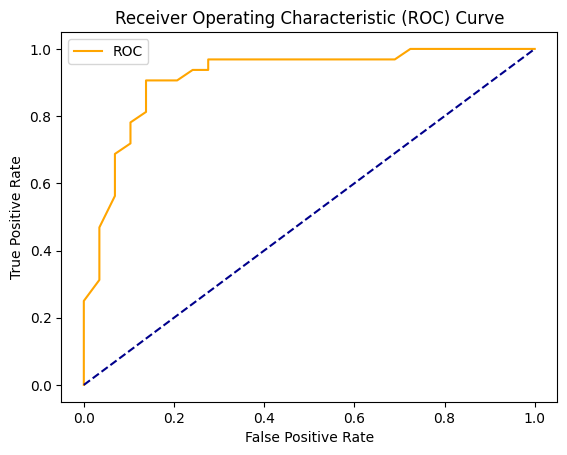

In [60]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9164870689655171

In [51]:
from sklearn.metrics import confusion_matrix
y_preds = model2.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 5, 27]])

In [53]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,25,4
1,5,27


<Axes: >

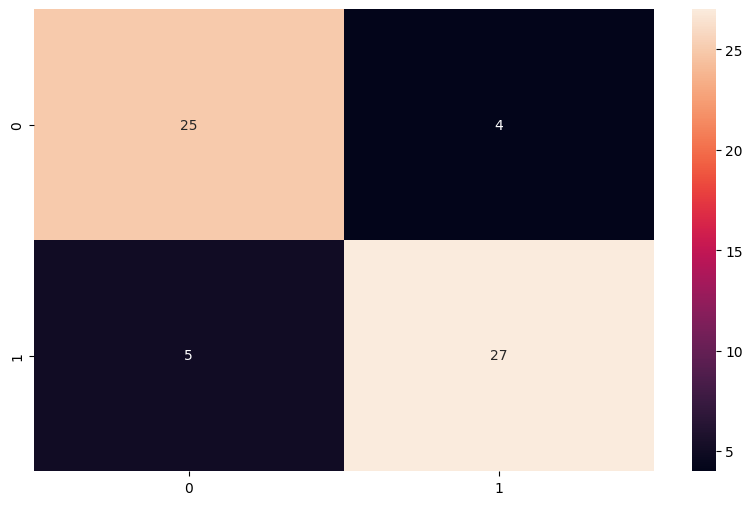

In [55]:
#Make confusion maxtrix more visual with Seaborn's heatmap()
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt="d")

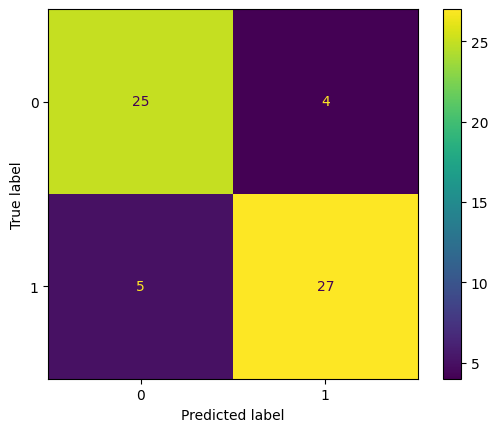

In [ ]:
#Creating a confusion matrix with scikit-learn (from estimators)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test)


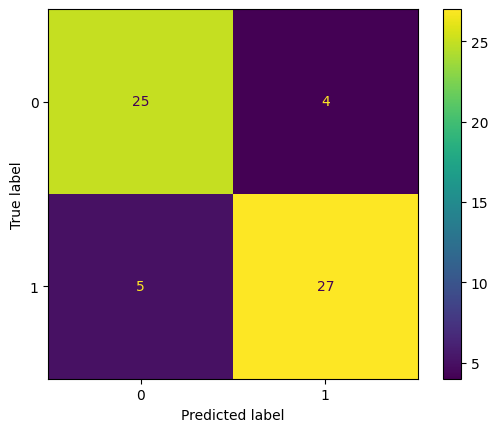

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [70]:
from sklearn.model_selection import cross_val_score
#Accuracy
cross_val_score(model2, X, y, cv=5, scoring="accuracy").mean()
#Precision
cross_val_score(model2, X, y, cv=5, scoring="precision").mean()
#Recall
cross_val_score(model2, X, y, cv=5, scoring="recall").mean()
#F1
cross_val_score(model2, X, y, cv=5, scoring="f1").mean()
print(f"Cross validated accuracy: {cross_val_score(model2, X, y, cv=5, scoring='accuracy').mean()*100:.2f}%")
print(f"Cross validated precision: {cross_val_score(model2, X, y, cv=5, scoring='precision').mean()*100:.2f}%")
print(f"Cross validated recall: {cross_val_score(model2, X, y, cv=5, scoring='recall').mean()*100:.2f}%")
print(f"Cross validated F1 score: {cross_val_score(model2, X, y, cv=5, scoring='f1').mean()*100:.2f}%")


Cross validated accuracy: 82.48%
Cross validated precision: 82.65%
Cross validated recall: 85.45%
Cross validated F1 score: 84.76%
